In [18]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [19]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [20]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [21]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [22]:
X.shape

(6, 3)

In [23]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### **Building LSTM Model**

In [24]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 30490.8379
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 30083.2578
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 29661.6855
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 29234.7344
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 28789.3125
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 28309.4551
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 27799.9277
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 27262.9395
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 26692.7441
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 26060.1348
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 25396.1250
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 24710.7988
Epoch 13/30

In [26]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


[222.67007]
1 day input [196.         210.         222.67007446]
1 day output [[232.90436]]
2 day input [210.         222.67007446 232.90435791]
2 day output [[246.2514]]
3 day input [222.67007 232.90436 246.2514 ]
3 day output [[258.77814]]
4 day input [232.90436 246.2514  258.77814]
4 day output [[270.50912]]
5 day input [246.2514  258.77814 270.50912]
5 day output [[284.17294]]
6 day input [258.77814 270.50912 284.17294]
6 day output [[297.47528]]
7 day input [270.50912 284.17294 297.47528]
7 day output [[310.84552]]
8 day input [284.17294 297.47528 310.84552]
8 day output [[325.48593]]
9 day input [297.47528 310.84552 325.48593]
9 day output [[340.17072]]
[222.67007, 232.90436, 246.2514, 258.77814, 270.50912, 284.17294, 297.47528, 310.84552, 325.48593, 340.17072]


In [27]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [28]:
len(timeseries_data)

9

In [29]:
lst_output

[222.67007,
 232.90436,
 246.2514,
 258.77814,
 270.50912,
 284.17294,
 297.47528,
 310.84552,
 325.48593,
 340.17072]

### **Visualising Output**

In [30]:
import matplotlib.pyplot as plt

In [31]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

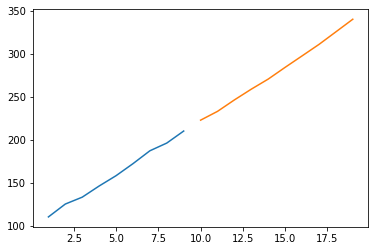

In [32]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)